

# Structural and Topological Analysis of the Co-Purchase Network



**1.) Computing degree distribution and visualizing it using a log-log plot**

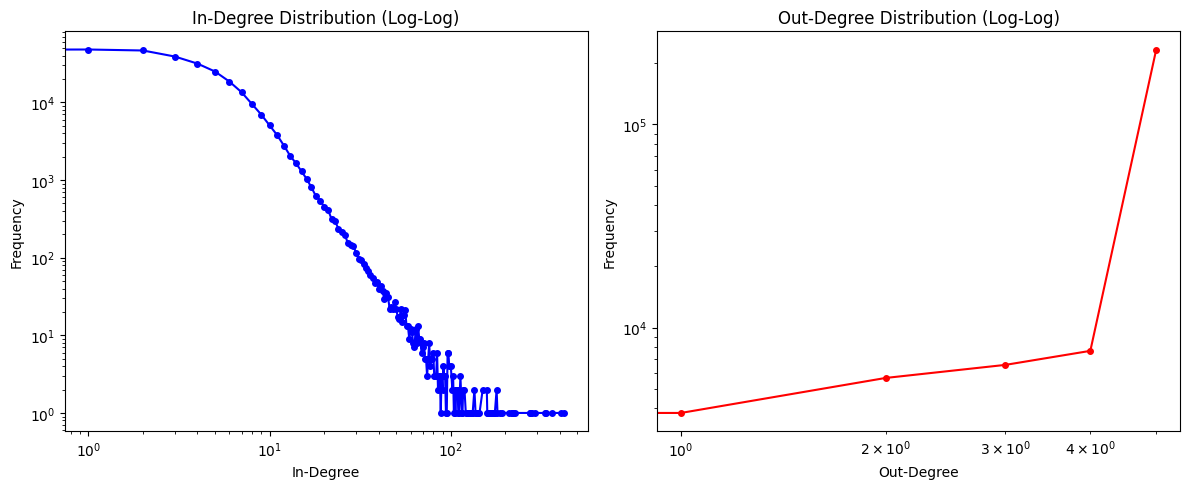

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load copurchase data
copurchase_df = pd.read_csv('copurchase.csv')

#  Step 2: Create a directed graph
G = nx.from_pandas_edgelist(
    copurchase_df,
    source='Source',
    target='Target',
    create_using=nx.DiGraph()
)

#  Step 3: Compute degrees
# In-degree: number of edges pointing to a node
# Out-degree: number of edges going out from a node
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

#  Step 4: Get degree frequencies
# Unique degree values and how often they occur
in_degree_values, in_degree_counts = np.unique(list(in_degrees.values()), return_counts=True)
out_degree_values, out_degree_counts = np.unique(list(out_degrees.values()), return_counts=True)

#  Step 5: Plot degree distributions on log-log scale
plt.figure(figsize=(12, 5))

# Plot In-Degree Distribution
plt.subplot(1, 2, 1)
plt.loglog(in_degree_values, in_degree_counts, 'bo-', markersize=4)
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.title('In-Degree Distribution (Log-Log)')

# Plot Out-Degree Distribution
plt.subplot(1, 2, 2)
plt.loglog(out_degree_values, out_degree_counts, 'ro-', markersize=4)
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.title('Out-Degree Distribution (Log-Log)')

plt.tight_layout()
plt.show()


**2.) Average Clustering Coefficient**

In [ ]:
# Convert to undirected for clustering
G_undirected = G.to_undirected()
avg_cluster = nx.average_clustering(G_undirected)
print(f"Average Clustering Coefficient: {avg_cluster:.4f}")


Average Clustering Coefficient: 0.4198


In [ ]:
# Degree Assortativity
assortativity = nx.degree_pearson_correlation_coefficient(G.to_undirected())
print(f"Assortativity Coefficient: {assortativity:.4f}")


Assortativity Coefficient: -0.0025


In [ ]:
# Strongly connected components
strongly_cc = list(nx.strongly_connected_components(G))
weakly_cc = list(nx.weakly_connected_components(G))

print(f"Number of Strongly Connected Components: {len(strongly_cc)}")
print(f"Number of Weakly Connected Components: {len(weakly_cc)}")

# Largest component sizes
largest_scc = max(strongly_cc, key=len)
largest_wcc = max(weakly_cc, key=len)

print(f"Largest SCC size: {len(largest_scc)}")
print(f"Largest WCC size: {len(largest_wcc)}")


Number of Strongly Connected Components: 6595
Number of Weakly Connected Components: 1
Largest SCC size: 241761
Largest WCC size: 262110


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Load data
def load_network_from_csv(filepath):
    """Load co-purchase network from CSV file."""
    print(f"Loading data from {filepath}...")
    edges_df = pd.read_csv(filepath)
    print(f"Data loaded. {len(edges_df)} edges found.")

    # Create directed graph
    G = nx.DiGraph()

    # Add edges from the dataframe
    for _, row in edges_df.iterrows():
        G.add_edge(row[0], row[1])  # Assuming first and second columns are source and target

    print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    return G

# Load the graph
G = load_network_from_csv("copurchase.csv")

# COMPARISON WITH RANDOM NETWORK (Erdős–Rényi)
print("\n==== COMPARISON WITH ERDŐS–RÉNYI RANDOM NETWORK ====")

# Number of nodes and edges in original graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Original network has {num_nodes} nodes and {num_edges} edges")

# Create undirected versions for some analyses
G_undir = G.to_undirected()
print(f"Converted to undirected graph with {G_undir.number_of_nodes()} nodes and {G_undir.number_of_edges()} edges")

# Create Erdős–Rényi random graph with same number of nodes and edges
print("\nGenerating Erdős–Rényi random graph...")
start_time = time.time()
G_random = nx.gnm_random_graph(n=num_nodes, m=num_edges, directed=True)
G_rand_undir = G_random.to_undirected()
print(f"Random graph generated in {time.time() - start_time:.2f} seconds")

print(f"Random graph has {G_random.number_of_nodes()} nodes and {G_random.number_of_edges()} edges")
print(f"Undirected random graph has {G_rand_undir.number_of_edges()} edges")

# CONNECTED COMPONENTS ANALYSIS AND COMPARISON
print("\n==== CONNECTED COMPONENTS COMPARISON ====")

# For directed graphs - weakly connected components
weak_ccs_orig = list(nx.weakly_connected_components(G))
weak_ccs_rand = list(nx.weakly_connected_components(G_random))

print("Weakly Connected Components:")
print(f"Original Graph: {len(weak_ccs_orig)} components, largest has {len(max(weak_ccs_orig, key=len))} nodes")
print(f"Random Graph:   {len(weak_ccs_rand)} components, largest has {len(max(weak_ccs_rand, key=len))} nodes")

# For directed graphs - strongly connected components
strong_ccs_orig = list(nx.strongly_connected_components(G))
strong_ccs_rand = list(nx.strongly_connected_components(G_random))

print("\nStrongly Connected Components:")
print(f"Original Graph: {len(strong_ccs_orig)} components, largest has {len(max(strong_ccs_orig, key=len))} nodes")
print(f"Random Graph:   {len(strong_ccs_rand)} components, largest has {len(max(strong_ccs_rand, key=len))} nodes")

# For undirected graphs
conn_comps_orig = list(nx.connected_components(G_undir))
conn_comps_rand = list(nx.connected_components(G_rand_undir))

print("\nUndirected Connected Components:")
print(f"Original Graph: {len(conn_comps_orig)} components, largest has {len(max(conn_comps_orig, key=len))} nodes")
print(f"Random Graph:   {len(conn_comps_rand)} components, largest has {len(max(conn_comps_rand, key=len))} nodes")

# CLUSTERING COEFFICIENT COMPARISON
print("\n==== CLUSTERING COEFFICIENT COMPARISON ====")
print("Calculating clustering coefficients...")

start_time = time.time()
original_clustering = nx.average_clustering(G_undir)
print(f"Original graph clustering calculated in {time.time() - start_time:.2f} seconds")

start_time = time.time()
random_clustering = nx.average_clustering(G_rand_undir)
print(f"Random graph clustering calculated in {time.time() - start_time:.2f} seconds")

print(f"Original Graph - Avg Clustering: {original_clustering:.6f}")
print(f"Random Graph   - Avg Clustering: {random_clustering:.6f}")
print(f"Clustering ratio (original/random): {original_clustering/random_clustering:.2f}x")

# If the ratio is significantly greater than 1, the original network likely has small-world properties
if original_clustering / random_clustering > 5:
    print("The original network shows significantly higher clustering than expected in a random network,")
    print("which is characteristic of small-world networks.")

# SHORTEST PATH COMPARISON
print("\n==== SHORTEST PATH COMPARISON ====")
print("Calculating average shortest path lengths...")

def safe_avg_shortest_path(graph, label):
    """Calculate average shortest path length safely for large graphs by sampling if needed."""
    try:
        # Get the largest connected component
        largest_cc = max(nx.connected_components(graph), key=len)
        subgraph = graph.subgraph(largest_cc).copy()

        print(f"{label} - Largest connected component has {len(subgraph)} nodes ({len(subgraph)/graph.number_of_nodes()*100:.1f}% of graph)")

        # For large graphs, sample nodes to speed up calculation
        if len(subgraph) > 1000:
            print(f"{label} - Large graph detected, sampling nodes for path calculation...")
            nodes = list(subgraph.nodes())
            np.random.seed(42)  # For reproducibility
            sampled_nodes = np.random.choice(nodes, 1000, replace=False)

            # For very large graphs, calculate paths between sample pairs instead
            if len(subgraph) > 10000:
                print(f"{label} - Very large graph, using sampling approach...")
                pairs = 0
                total_path_length = 0

                # Sample 10,000 random pairs
                for _ in range(10000):
                    source = np.random.choice(sampled_nodes)
                    target = np.random.choice(sampled_nodes)
                    if source != target:
                        try:
                            path_length = nx.shortest_path_length(subgraph, source=source, target=target)
                            total_path_length += path_length
                            pairs += 1
                        except nx.NetworkXNoPath:
                            pass

                if pairs > 0:
                    avg_path = total_path_length / pairs
                    print(f"{label} - Estimated Avg Shortest Path Length: {avg_path:.4f} (from {pairs} sampled pairs)")
                    return avg_path
                else:
                    print(f"{label} - Could not estimate path length with sampling")
                    return None
            else:
                # Use NetworkX's built-in function with sampled nodes
                subgraph = subgraph.subgraph(sampled_nodes)
                print(f"{label} - Subsampled to {len(subgraph)} nodes")

        # Calculate average shortest path
        avg_path = nx.average_shortest_path_length(subgraph)
        print(f"{label} - Avg Shortest Path Length: {avg_path:.4f}")
        return avg_path

    except Exception as e:
        print(f"{label} - Error in path length calculation: {str(e)}")
        return None

# Calculate average shortest paths
orig_path = safe_avg_shortest_path(G_undir, "Original Graph")
rand_path = safe_avg_shortest_path(G_rand_undir, "Random Graph")

# Compare if both calculations were successful
if orig_path and rand_path:
    path_ratio = rand_path / orig_path
    print(f"Path length ratio (random/original): {path_ratio:.2f}x")

    if path_ratio > 1 and original_clustering / random_clustering > 5:
        print("\nSMALL-WORLD NETWORK ANALYSIS:")
        print("Your co-purchase network shows small-world properties:")
        print(f"1. Much higher clustering than random ({original_clustering/random_clustering:.1f}x)")
        print(f"2. Similar or shorter paths than random (random is {path_ratio:.1f}x longer)")
        print("This indicates a highly efficient network structure for information or influence spread.")
    else:
        print("\nYour network does not exhibit clear small-world properties.")

# DEGREE DISTRIBUTION COMPARISON
print("\n==== DEGREE DISTRIBUTION COMPARISON ====")

# Get degree distributions
orig_degrees = [d for n, d in G_undir.degree()]
rand_degrees = [d for n, d in G_rand_undir.degree()]

# Calculate basic statistics
print(f"Original Graph - Avg Degree: {np.mean(orig_degrees):.2f}, Max Degree: {max(orig_degrees)}")
print(f"Random Graph   - Avg Degree: {np.mean(rand_degrees):.2f}, Max Degree: {max(rand_degrees)}")

# Plot degree distributions for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist([orig_degrees, rand_degrees], bins=50, alpha=0.7, label=['Original', 'Random'])
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist([orig_degrees, rand_degrees], bins=50, alpha=0.7, label=['Original', 'Random'])
plt.title('Degree Distribution (Log Scale)')
plt.xlabel('Degree')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.savefig('degree_distribution_comparison.png')
plt.close()

print("Degree distribution comparison plot saved.")

# Check for power-law distribution in original graph (characteristic of scale-free networks)
# This is a simple check - more sophisticated methods exist
degrees = np.array(orig_degrees)
degrees = degrees[degrees > 0]  # Remove zero degrees for log-log plot

if len(degrees) > 0:
    # Create log bins
    log_bins = np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), 20)

    plt.figure(figsize=(8, 6))
    plt.hist(degrees, bins=log_bins, alpha=0.7)
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Log-Log Degree Distribution (Original Network)')
    plt.xlabel('Degree (log scale)')
    plt.ylabel('Frequency (log scale)')
    plt.savefig('power_law_check.png')
    plt.close()

    print("Log-log plot saved for checking power-law properties.")

    # Simple power-law check (very basic)
    # A proper test would use statistical methods like the Kolmogorov-Smirnov test
    top_10_percent = np.percentile(degrees, 90)
    bottom_50_percent = np.percentile(degrees, 50)

    if top_10_percent / bottom_50_percent > 10:
        print("\nYour network might have scale-free properties (power-law degree distribution).")
        print("This suggests a 'rich get richer' dynamic where popular products become even more popular.")
    else:
        print("\nYour network doesn't show clear scale-free properties in this basic check.")

print("\nRandom graph comparison analysis complete!")

Loading data from copurchase.csv...
Data loaded. 1234870 edges found.


<ipython-input-6-0dc0a7eba305>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  G.add_edge(row[0], row[1])  # Assuming first and second columns are source and target


Graph created with 262110 nodes and 1234870 edges.

==== COMPARISON WITH ERDŐS–RÉNYI RANDOM NETWORK ====
Original network has 262110 nodes and 1234870 edges
Converted to undirected graph with 262110 nodes and 899787 edges

Generating Erdős–Rényi random graph...
Random graph generated in 15.29 seconds
Random graph has 262110 nodes and 1234870 edges
Undirected random graph has 1234861 edges

==== CONNECTED COMPONENTS COMPARISON ====
Weakly Connected Components:
Original Graph: 1 components, largest has 262110 nodes
Random Graph:   20 components, largest has 262091 nodes

Strongly Connected Components:
Original Graph: 6595 components, largest has 241761 nodes
Random Graph:   4819 components, largest has 257292 nodes

Undirected Connected Components:
Original Graph: 1 components, largest has 262110 nodes
Random Graph:   20 components, largest has 262091 nodes

==== CLUSTERING COEFFICIENT COMPARISON ====
Calculating clustering coefficients...
Original graph clustering calculated in 9.49 sec

# Community Detection and Modularity Analysis

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from community import best_partition
from collections import Counter

# Load data
def load_network_from_csv(filepath):
    """Load co-purchase network from CSV file."""
    print(f"Loading data from {filepath}...")
    edges_df = pd.read_csv(filepath)
    print(f"Data loaded. {len(edges_df)} edges found.")

    # Create directed graph
    G = nx.DiGraph()

    # Add edges from the dataframe
    for _, row in edges_df.iterrows():
        G.add_edge(row[0], row[1])  # Assuming first and second columns are source and target

    print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    return G

# Load the graph
G = load_network_from_csv("copurchase.csv")

# Convert to undirected for community detection
G_undir = G.to_undirected()
print(f"Undirected graph created with {G_undir.number_of_nodes()} nodes and {G_undir.number_of_edges()} edges.")

# COMMUNITY DETECTION AND MODULARITY ANALYSIS
print("\n==== COMMUNITY DETECTION ====")

# Get largest connected component for community detection
largest_cc = max(nx.connected_components(G_undir), key=len)
largest_subgraph = G_undir.subgraph(largest_cc).copy()

print(f"Performing community detection on largest connected component ({len(largest_subgraph)} nodes)...")

# Apply Louvain community detection
partition = best_partition(largest_subgraph)
communities = Counter(partition.values())

# Calculate modularity
modularity = nx.community.modularity(largest_subgraph, [
    {node for node, community_id in partition.items() if community_id == i}
    for i in range(max(partition.values()) + 1)
])

print(f"Number of communities detected: {len(communities)}")
print(f"Modularity score: {modularity:.4f}")
print(f"Size of largest community: {communities.most_common(1)[0][1]}")

# Get top 5 communities by size
top_communities = communities.most_common(5)
print("\nTop 5 communities by size:")
for i, (comm_id, size) in enumerate(top_communities):
    print(f"Community {i+1}: {size} nodes ({size/len(largest_subgraph)*100:.1f}% of largest component)")

    # Get nodes in this community
    community_nodes = [node for node, comm in partition.items() if comm == comm_id]

    # Find central nodes in community using PageRank
    community_subgraph = largest_subgraph.subgraph(community_nodes).copy()
    pageranks = nx.pagerank(community_subgraph)
    top_nodes = sorted(pageranks.items(), key=lambda x: x[1], reverse=True)[:5]

    print(f"  Top central products: {[node for node, _ in top_nodes]}")

# Visualize community sizes
plt.figure(figsize=(10, 6))
sizes = [count for _, count in communities.most_common()]
plt.bar(range(len(sizes)), sizes)
plt.title('Community Size Distribution')
plt.xlabel('Community Rank')
plt.ylabel('Number of Nodes')
plt.savefig('community_sizes.png')
plt.close()

print("Community size distribution plot saved.")

# Visualization of network with communities (if not too large)
if len(largest_subgraph) <= 5000:  # Only visualize if reasonably sized
    print("\nGenerating community visualization (this may take a while)...")

    plt.figure(figsize=(12, 12))

    # Limit to top communities for clearer visualization
    top_comm_ids = [comm_id for comm_id, _ in top_communities]
    viz_nodes = [node for node, comm in partition.items() if comm in top_comm_ids]
    viz_graph = largest_subgraph.subgraph(viz_nodes).copy()

    # Position nodes using force-directed layout
    pos = nx.spring_layout(viz_graph, seed=42)

    # Draw nodes colored by community
    for comm_id in top_comm_ids:
        nodelist = [node for node in viz_graph.nodes() if partition[node] == comm_id]
        nx.draw_networkx_nodes(
            viz_graph,
            pos,
            nodelist=nodelist,
            node_size=20,
            node_color=f"C{comm_id}",
            label=f"Community {comm_id}"
        )

    # Draw edges
    nx.draw_networkx_edges(viz_graph, pos, alpha=0.1)

    plt.legend()
    plt.title("Top Communities in Co-Purchase Network")
    plt.axis('off')
    plt.savefig('community_visualization.png', dpi=300)
    plt.close()

    print("Community visualization saved.")
else:
    print("Network too large for full visualization.")

# Optional: Save community data for further analysis
community_df = pd.DataFrame([(node, comm) for node, comm in partition.items()],
                           columns=['product_id', 'community_id'])
community_df.to_csv('product_communities.csv', index=False)
print("Community assignments saved to 'product_communities.csv'")

print("\nCommunity detection analysis complete!")

Loading data from copurchase.csv...
Data loaded. 1234870 edges found.


<ipython-input-5-6d987a094bcb>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  G.add_edge(row[0], row[1])  # Assuming first and second columns are source and target


Graph created with 262110 nodes and 1234870 edges.
Undirected graph created with 262110 nodes and 899787 edges.

==== COMMUNITY DETECTION ====
Performing community detection on largest connected component (262110 nodes)...
Number of communities detected: 164
Modularity score: 0.9016
Size of largest community: 16517

Top 5 communities by size:
Community 1: 16517 nodes (6.3% of largest component)
  Top central products: [np.int64(1241), np.int64(3661), np.int64(9131), np.int64(3673), np.int64(1964)]
Community 2: 11217 nodes (4.3% of largest component)
  Top central products: [np.int64(14949), np.int64(30171), np.int64(7303), np.int64(22073), np.int64(9955)]
Community 3: 10596 nodes (4.0% of largest component)
  Top central products: [np.int64(12608), np.int64(6067), np.int64(14573), np.int64(13932), np.int64(36122)]
Community 4: 10289 nodes (3.9% of largest component)
  Top central products: [np.int64(31037), np.int64(15934), np.int64(26010), np.int64(20898), np.int64(20899)]
Community 5

In [ ]:
# Step 1: Calculate PageRank for the largest connected component
# (You already have the partition variable containing community assignments)

# First, identify the top communities (already computed in your output)
top_communities_sorted = communities.most_common(5)

# Step 2: Compute PageRank for each community
for i, (comm_id, size) in enumerate(top_communities_sorted):
    print(f"\nAnalyzing Community {comm_id}: {size} nodes")

    # Get nodes in this community
    community_nodes = [node for node, comm in partition.items() if comm == comm_id]

    # Get the subgraph for this community
    community_subgraph = largest_subgraph.subgraph(community_nodes).copy()

    # Step 3: Compute PageRank for nodes in the community
    pagerank_scores = nx.pagerank(community_subgraph)

    # Step 4: Sort products by PageRank score to get the top central products
    top_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:5]

    print(f"  Top central products in Community {comm_id}:")
    for node, score in top_nodes:
        print(f"    Product ID: {node}, PageRank Score: {score:.4f}")


Analyzing Community 10: 16517 nodes
  Top central products in Community 10:
    Product ID: 1241, PageRank Score: 0.0011
    Product ID: 3661, PageRank Score: 0.0011
    Product ID: 9131, PageRank Score: 0.0010
    Product ID: 3673, PageRank Score: 0.0010
    Product ID: 1964, PageRank Score: 0.0009

Analyzing Community 33: 11217 nodes
  Top central products in Community 33:
    Product ID: 14949, PageRank Score: 0.0041
    Product ID: 30171, PageRank Score: 0.0013
    Product ID: 7303, PageRank Score: 0.0012
    Product ID: 22073, PageRank Score: 0.0010
    Product ID: 9955, PageRank Score: 0.0010

Analyzing Community 42: 10596 nodes
  Top central products in Community 42:
    Product ID: 12608, PageRank Score: 0.0011
    Product ID: 6067, PageRank Score: 0.0010
    Product ID: 14573, PageRank Score: 0.0008
    Product ID: 13932, PageRank Score: 0.0008
    Product ID: 36122, PageRank Score: 0.0008

Analyzing Community 62: 10289 nodes
  Top central products in Community 62:
    Produc

In [ ]:
# Assuming 'df_filter' contains product names and IDs
# The 'df_filter' DataFrame should have columns ['id', 'title']
# 'id' represents the Product ID, and 'title' represents the Product Name

# Example: Simulate loading of df_filter (make sure this is loaded with your product data)
df_filter = pd.read_csv("products.csv")  # Adjust this to your file path

# Step 1: Retrieve the top central products and their names
for i, (comm_id, size) in enumerate(top_communities_sorted):
    community_nodes = [node for node, comm in partition.items() if comm == comm_id]
    community_subgraph = largest_subgraph.subgraph(community_nodes).copy()
    pagerank_scores = nx.pagerank(community_subgraph)

    # Sort by PageRank to get top products
    top_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"\nTop central products in Community {comm_id}:")

    for node, score in top_nodes:
        # Retrieve the product name using the node (Product ID)
        product_name = df_filter[df_filter['id'] == node]['title'].values
        if len(product_name) > 0:
            print(f"  Product ID: {node}, Product Name: {product_name[0]}, PageRank Score: {score:.4f}")
        else:
            print(f"  Product ID: {node}, Product Name: Not Found, PageRank Score: {score:.4f}")



Top central products in Community 10:
  Product ID: 1241, Product Name: Accessible Physics, PageRank Score: 0.0011
  Product ID: 3661, Product Name: Radiographic Anatomy and Positioning, PageRank Score: 0.0011
  Product ID: 9131, Product Name: Brazil Forró: Music for Maids and Taxi Drivers, PageRank Score: 0.0010
  Product ID: 3673, Product Name: Linguistic Imperialism (Oxford Applied Linguistics S.), PageRank Score: 0.0010
  Product ID: 1964, Product Name: Gourmet Vinegars: How to Make and Cook With Them, PageRank Score: 0.0009

Top central products in Community 33:
  Product ID: 14949, Product Name: Fodor's Australia 2000, PageRank Score: 0.0041
  Product ID: 30171, Product Name: My Book of Love, PageRank Score: 0.0013
  Product ID: 7303, Product Name: Everyone's Way of the Cross, PageRank Score: 0.0012
  Product ID: 22073, Product Name: Silent Symphony : The Art of Marty Holcomb, PageRank Score: 0.0010
  Product ID: 9955, Product Name: Cultures of Natural History, PageRank Score: 0

# Scale-Free & Small-World Nature Investigation